In [1]:
from IPython.display import display, HTML
display(HTML("""
<style>
div.container{width:99% !important;}
div.cell.code_cell.rendered{width:100%;}
div.input_prompt{padding:0px;}
div.CodeMirror {font-family:Consolas; font-size:24pt;}
div.text_cell_render.rendered_html{font-size:20pt;}
div.text_cell_render ul li, code{font-size:22pt; line-height:30px;}
div.output {font-size:24pt; font-weight:bold;}
div.input {font-family:Consolas; font-size:24pt;}
div.prompt {min-width:70px;}
div#toc-wrapper{padding-top:120px;}
div.text_cell_render ul li{font-size:24pt;padding:5px;}
table.dataframe{font-size:24px;}
</style>
"""))

# 데이터셋을 라이브러리에서 가져올 예정. 파일에서도 봄

In [2]:
import numpy as np
import pandas as pd
from tensorflow.keras.datasets import mnist # mnist 훈련셋과 테스트셋
from tensorflow.keras.utils import to_categorical # 원핫인코딩
from tensorflow.keras.models import Sequential, save_model, load_model
from tensorflow.keras.layers import Dense, Input, Dropout
from tensorflow.keras.layers import LeakyReLU, ELU, ReLU
from matplotlib import pyplot as plt # 학습과정 시각화
# scale조정, train_test_split 등을 추가

In [3]:
data = np.loadtxt('data/mnist_train_small.csv', delimiter=',', skiprows=1)
data.shape

(100, 785)

In [4]:
print('타겟 :', data[1,0])
#print('이미지(784pixel=28*28) :', data[1, 1:].reshape(28,28))
image = data[1, 1:].reshape(28,28)
image.shape

타겟 : 0.0


(28, 28)

In [5]:
for row in image:
    for pixel in row:
        print("{:3.0f}".format(pixel), end='')
    print()

  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0 51159253159 50  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0 48238252252252237  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0 54227253252239233252 57  6  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0 10 60224252253252202 84252253122  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0163252252252253252252 96189253167  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0 51238253253190114253228 47 79255168  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0 48238252252179 12 75121 21  0  0253243 50  0  0  0  0  0
  0  0  0  0  0  0  0  0 38165253233208 84  0  0  0  0  0  025325

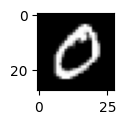

In [6]:
plt.figure(figsize=(1,1))
plt.imshow(image, cmap='gray')

In [7]:
# 칼라사진 -> 흑백모드로 넘파이 배열로 읽기


In [8]:
%pip install opencv-python==4.8.1.78

Note: you may need to restart the kernel to use updated packages.


In [9]:
import cv2
# 사진이미지를 흑백포맷으로 넘파이 배열로 읽어오기
image_gray = cv2.imread('data/sample.jpg', cv2.IMREAD_GRAYSCALE)
image_gray.shape

(408, 612)

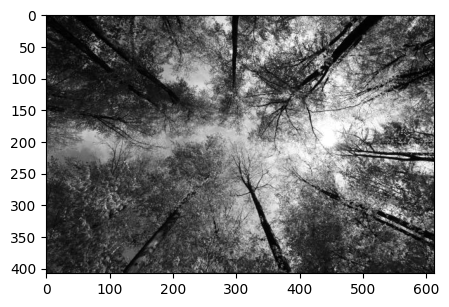

In [10]:
plt.figure(figsize=(5,5))
plt.imshow(image_gray, cmap='gray')

# 1. 데이터 생성 및 전처리

In [11]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

2


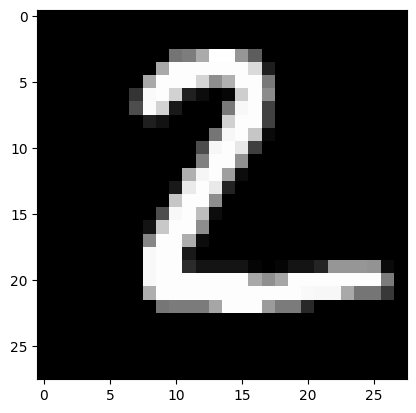

  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0116125171255255150 93  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0169253253253253253253218 30  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0169253253253213142176253253122  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0 52250253210 32 12  0  6206253140  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0 77251210 25  0  0  0122248253 65  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0 31 18  0  0  0  0209253253 65  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0117247253198 10  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0 76247253231 63  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0128253253144  0  0  0  0  0  

In [12]:
print(y_test[1])
plt.imshow(X_test[1], cmap='gray')
plt.show()
for row in X_test[1]:
    for pixel in row:
        print("{:3.0f}".format(pixel), end='')
    print()

In [13]:
# Train데이터 6만개 => Train(5만개) + val(만개)로 분리
X_val = X_train[50000:]
y_val = y_train[50000:]
X_train = X_train[:50000]
y_train = y_train[:50000]

In [14]:
print('학습셋 :', X_train.shape, y_train.shape)
print('검증셋 :', X_val.shape, y_val.shape)
print('시험셋 :', X_test.shape, y_test.shape)

학습셋 : (50000, 28, 28) (50000,)
검증셋 : (10000, 28, 28) (10000,)
시험셋 : (10000, 28, 28) (10000,)


In [15]:
# 입력(독립) 변수 (n, 28, 28) -> (n, 28*28) -> 실수형변환 -> 스케일조정(/255.0)
train_X = X_train.reshape(50000, 28*28).astype('float32')/255.0
val_X   = X_val.reshape(-1, 784).astype('float32')/255.0
test_X  = X_test.reshape(10000, -1).astype('float32')/255.0
train_X.shape, val_X.shape, test_X.shape

((50000, 784), (10000, 784), (10000, 784))

In [16]:
# 분류분석을 위한 타겟변수의 원핫인코딩
# print(y_train[0])
# to_categorical(y_train)[0]
train_Y = to_categorical(y_train, 10) # 10:카테고리수(안쓰면 자동 입력)
val_Y   = to_categorical(y_val)
test_Y  = to_categorical(y_test)
train_Y.shape, val_Y.shape, test_Y.shape

((50000, 10), (10000, 10), (10000, 10))

In [17]:
# Train 5만->700개, Val만->300개 (목적:수업시간 중 fit시간 절약)
train_idx = np.random.choice(50000, 700) # 0~50000미만의 수 700개 비복원추출
val_idx   = np.random.choice(10000, 300)
train_X = train_X[train_idx]
train_Y = train_Y[train_idx]
val_X   = val_X[val_idx]
val_Y   = val_Y[val_idx]

In [18]:
train_X.shape, train_Y.shape, val_X.shape, val_Y.shape, test_X.shape, test_Y.shape

((700, 784), (700, 10), (300, 784), (300, 10), (10000, 784), (10000, 10))

# 2. 모델구성

In [91]:
model = Sequential()
model.add(Input(shape=(784,)))
model.add(Dense(units=2)) # activation='leakeyrelu' 사용불가
# model.add(ReLU())
model.add(LeakyReLU(alpha=0.01)) # 음수결과에 대해 1%만 통과
model.add(Dense(units=10, activation='softmax'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 2)                 1570      
                                                                 
 leaky_re_lu_1 (LeakyReLU)   (None, 2)                 0         
                                                                 
 dense_3 (Dense)             (None, 10)                30        
                                                                 
Total params: 1,600
Trainable params: 1,600
Non-trainable params: 0
_________________________________________________________________


# 3. 학습과정 설정

In [92]:
model.compile(loss='categorical_crossentropy', # sparse_categorical_crossentropy
             optimizer='adam',
             metrics=['accuracy'])# 평가지표

# 4. 모델 학습

In [93]:
%%time
hist = model.fit(train_X, train_Y, # 학습셋
                epochs=200,
                batch_size=100,
                validation_data=(val_X, val_Y),
                verbose=0)

CPU times: total: 7.83 s
Wall time: 6.81 s


# 5. 모델 평가하기

In [94]:
hist.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

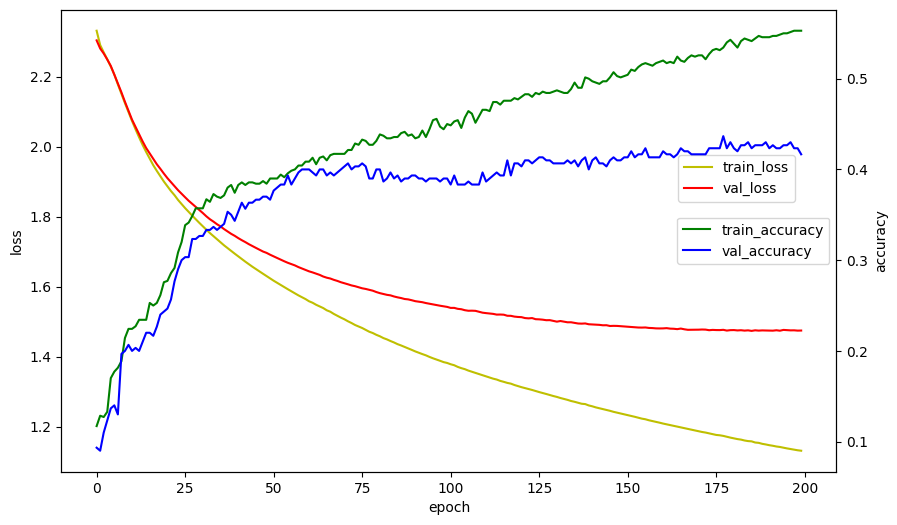

In [95]:
# 학습과정 표시하기
import matplotlib.pyplot as plt
fig, loss_ax = plt.subplots(figsize=(10,6))
loss_ax.plot(hist.history['loss'], 'y', label='train_loss')
loss_ax.plot(hist.history['val_loss'], 'r', label='val_loss')
acc_ax = loss_ax.twinx() # loss_ax와 x축을 공유하는 acc_ax 생성
acc_ax.plot(hist.history['accuracy'], 'g', label='train_accuracy')
acc_ax.plot(hist.history['val_accuracy'], 'b', label='val_accuracy')
loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
acc_ax.set_ylabel('accuracy')
loss_ax.legend(bbox_to_anchor=(0.955, 0.7))
acc_ax.legend(loc='center right')
plt.show()

In [99]:
# 모델 평가(테스트셋)
loss_metrics = model.evaluate(test_X, test_Y, batch_size=100, verbose=0)
print('loss :', loss_metrics[0])
print('accuracy :', loss_metrics[1])

loss : 1.5109293460845947
accuracy : 0.42179998755455017


# 👍 위 모델(DNN)의 accuracy 늘리기
- 데이터 확보
- 모델 수정(레이어 추가, units수 증가)
- 과적합 방지(validation data 추가, 활성화 함수 relu계열, tanh, dropout)
- epoch 조정
- optimizer 변경

In [53]:
%%time
(X_train, y_train), (X_test, y_test) = mnist.load_data()
# Train데이터 6만개 => Train(5만개) + val(만개)로 분리
X_val = X_train[50000:]
y_val = y_train[50000:]
X_train = X_train[:50000]
y_train = y_train[:50000]
# 입력(독립) 변수 (n, 28, 28) -> (n, 28*28) -> 실수형변환 -> 스케일조정(/255.0)
train_X = X_train.reshape(50000, 28*28).astype('float32')/255.0
val_X   = X_val.reshape(-1, 784).astype('float32')/255.0
test_X  = X_test.reshape(10000, -1).astype('float32')/255.0
# 분류분석을 위한 타겟변수의 원핫인코딩
# print(y_train[0])
# to_categorical(y_train)[0]
train_Y = to_categorical(y_train, 10) # 10:카테고리수(안쓰면 자동 입력)
val_Y   = to_categorical(y_val)
test_Y  = to_categorical(y_test)
# Train 5만->700개, Val만->300개 (목적:수업시간 중 fit시간 절약)
# train_idx = np.random.choice(50000, 700) # 0~50000미만의 수 700개 비복원추출
# val_idx   = np.random.choice(10000, 300)
# train_X = train_X[train_idx]
# train_Y = train_Y[train_idx]
# val_X   = val_X[val_idx]
# val_Y   = val_Y[val_idx]
# 모델
model = Sequential()
model.add(Input(shape=(784,)))
model.add(Dense(units=1024, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(units=512, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(units=128))
model.add(LeakyReLU(alpha=0.01)) # 음수결과에 대해 1%만 통과
model.add(Dropout(0.3))
model.add(Dense(units=10, activation='softmax'))
print(model.summary())
model.compile(loss='categorical_crossentropy', # sparse_categorical_crossentropy
             optimizer='adam',
             metrics=['accuracy'])# 평가지표

hist = model.fit(train_X, train_Y, # 학습셋
                epochs=20,
                batch_size=100,
                validation_data=(val_X, val_Y),
                verbose=0)

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_33 (Dense)            (None, 1024)              803840    
                                                                 
 dropout_22 (Dropout)        (None, 1024)              0         
                                                                 
 dense_34 (Dense)            (None, 512)               524800    
                                                                 
 dropout_23 (Dropout)        (None, 512)               0         
                                                                 
 dense_35 (Dense)            (None, 128)               65664     
                                                                 
 leaky_re_lu_9 (LeakyReLU)   (None, 128)               0         
                                                                 
 dropout_24 (Dropout)        (None, 128)              

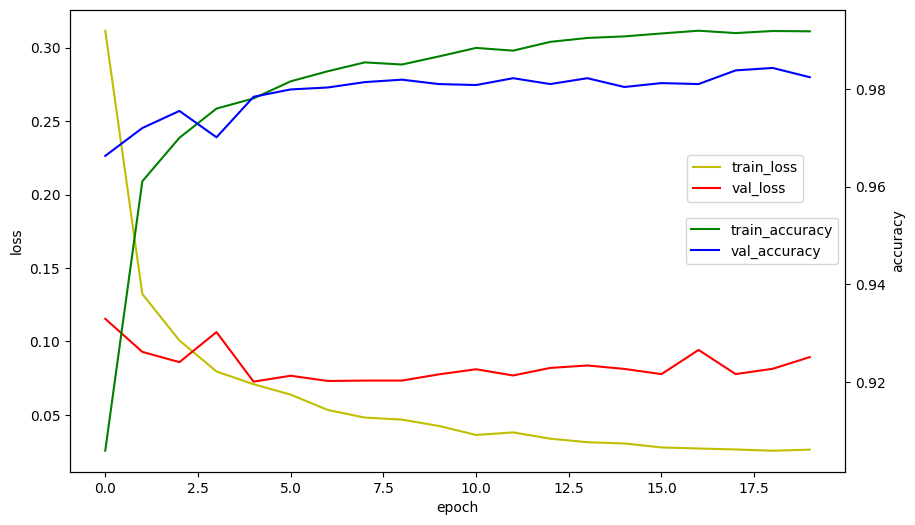

In [34]:
# 모델 평가
# 학습과정 표시하기
import matplotlib.pyplot as plt
fig, loss_ax = plt.subplots(figsize=(10,6))
loss_ax.plot(hist.history['loss'], 'y', label='train_loss')
loss_ax.plot(hist.history['val_loss'], 'r', label='val_loss')
acc_ax = loss_ax.twinx() # loss_ax와 x축을 공유하는 acc_ax 생성
acc_ax.plot(hist.history['accuracy'], 'g', label='train_accuracy')
acc_ax.plot(hist.history['val_accuracy'], 'b', label='val_accuracy')
loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
acc_ax.set_ylabel('accuracy')
loss_ax.legend(bbox_to_anchor=(0.955, 0.7))
acc_ax.legend(loc='center right')
plt.show()

In [50]:
# 모델 평가
score = model.evaluate(test_X, test_Y)
score[1]

313/313 [==============================] - 1s 3ms/step - loss: 0.0795 - accuracy: 0.9823


0.9822999835014343

In [40]:
# 교차표
np.all(test_Y.argmax(axis=1) == y_test) # 실제값(y_test)

True

In [46]:
# model.predict(test_X).argmax(axis=1)
y_hat = np.argmax(model.predict(test_X), axis=1) # 예측값

313/313 [==============================] - 1s 3ms/step


In [48]:
pd.crosstab(y_test, y_hat, rownames=['실제값'], colnames=['예측값'])

예측값,0,1,2,3,4,5,6,7,8,9
실제값,,,,,,,,,,
0,971,1,0,0,0,3,2,1,2,0
1,0,1128,2,0,0,0,2,0,3,0
2,1,0,1023,0,3,0,1,1,3,0
3,2,0,6,984,0,10,0,3,3,2
4,0,0,2,0,964,0,3,0,1,12
5,3,0,0,1,1,881,3,0,2,1
6,3,2,0,0,3,2,947,0,1,0
7,0,5,23,4,0,0,0,988,4,4
8,3,0,7,3,2,4,1,1,951,2


In [52]:
# 틀린 갯수
10000-10000*score[1]

177.00016498565674

# ※ 콜백함수1 : 로그출력

In [54]:
from tensorflow.keras.callbacks import Callback, EarlyStopping, ModelCheckpoint

In [56]:
%%time
# 특정 에포크마다 로그출력하도록 제한
class CustomHistory(Callback):
    def __init__(self): # 생성자함수
        self.epoch = 0
    def on_epoch_end(self, batch, logs={}):
        '1 epoch마다 자동 실행되는 함수'
        self.epoch += 1
        if self.epoch%10 == 0:
            print('epoch:{}, loss:{:.4f}, acc:{:.4f}, val_loss:{:.4f}, val_acc:{:.4f}'\
                  .format(self.epoch, 
                          logs.get('loss'), 
                          logs.get('accuracy', '-'),
                          logs.get('val_loss', '-'), 
                          logs.get('val_accuracy', '-')
                )
            )

(X_train, y_train), (X_test, y_test) = mnist.load_data()
# Train데이터 6만개 => Train(5만개) + val(만개)로 분리
X_val = X_train[50000:]
y_val = y_train[50000:]
X_train = X_train[:50000]
y_train = y_train[:50000]
# 입력(독립) 변수 (n, 28, 28) -> (n, 28*28) -> 실수형변환 -> 스케일조정(/255.0)
train_X = X_train.reshape(50000, 28*28).astype('float32')/255.0
val_X   = X_val.reshape(-1, 784).astype('float32')/255.0
test_X  = X_test.reshape(10000, -1).astype('float32')/255.0
# 분류분석을 위한 타겟변수의 원핫인코딩
# print(y_train[0])
# to_categorical(y_train)[0]
train_Y = to_categorical(y_train, 10) # 10:카테고리수(안쓰면 자동 입력)
val_Y   = to_categorical(y_val)
test_Y  = to_categorical(y_test)
# Train 5만->700개, Val만->300개 (목적:수업시간 중 fit시간 절약)
train_idx = np.random.choice(50000, 700) # 0~50000미만의 수 700개 비복원추출
val_idx   = np.random.choice(10000, 300)
train_X = train_X[train_idx]
train_Y = train_Y[train_idx]
val_X   = val_X[val_idx]
val_Y   = val_Y[val_idx]
# 모델
model = Sequential()
model.add(Input(shape=(784,)))
model.add(Dense(units=2, activation='relu'))
model.add(Dense(units=10, activation='softmax'))
model.compile(loss='categorical_crossentropy', # sparse_categorical_crossentropy
             optimizer='adam',
             metrics=['accuracy'])# 평가지표
customHistory = CustomHistory()  
hist = model.fit(train_X, train_Y, # 학습셋
                epochs=50,
                batch_size=100,
                validation_data=(val_X, val_Y),
                verbose=0,
                callbacks=[customHistory]) # 콜백함수

epoch:10, loss:2.0661, acc:0.2914, val_loss:2.0774, val_acc:0.2500
epoch:20, loss:1.9019, acc:0.3257, val_loss:1.9486, val_acc:0.2767
epoch:30, loss:1.8035, acc:0.3829, val_loss:1.8788, val_acc:0.3067
epoch:40, loss:1.7311, acc:0.4014, val_loss:1.8230, val_acc:0.3100
epoch:50, loss:1.6737, acc:0.4100, val_loss:1.7806, val_acc:0.3400
CPU times: total: 2.64 s
Wall time: 2.47 s


# ※ 콜백함수2 : EarlyStopping
- val_loss값이 늘어나면 지정한 epoch를 다 수행하지 않고 조기 종료
- val_accuracy값이 감소하면 지정한 epoch를 다 수행하지 않고 조기 종료

In [58]:
# 모델
model = Sequential()
model.add(Input(shape=(784,)))
model.add(Dense(units=2, activation='relu'))
model.add(Dense(units=10, activation='softmax'))
model.compile(loss='categorical_crossentropy', # sparse_categorical_crossentropy
             optimizer='adam',
             metrics=['accuracy'])# 평가지표

# monitor 기준으로 patience번 이상 안 좋은 데이터가 나오면 조기 종료
earlyStopping = EarlyStopping(monitor='val_accuracy', patience=3)

hist = model.fit(train_X, train_Y, # 학습셋
                epochs=500,
                batch_size=100,
                validation_data=(val_X, val_Y),
                verbose=1,
                callbacks=[earlyStopping]) # 콜백함수

Epoch 1/500
7/7 [==============================] - 0s 25ms/step - loss: 2.2813 - accuracy: 0.1543 - val_loss: 2.2669 - val_accuracy: 0.1667
Epoch 2/500
7/7 [==============================] - 0s 5ms/step - loss: 2.2543 - accuracy: 0.1729 - val_loss: 2.2459 - val_accuracy: 0.1633
Epoch 3/500
7/7 [==============================] - 0s 8ms/step - loss: 2.2318 - accuracy: 0.1871 - val_loss: 2.2192 - val_accuracy: 0.1833
Epoch 4/500
7/7 [==============================] - 0s 6ms/step - loss: 2.2063 - accuracy: 0.2200 - val_loss: 2.1882 - val_accuracy: 0.1933
Epoch 5/500
7/7 [==============================] - 0s 6ms/step - loss: 2.1808 - accuracy: 0.2271 - val_loss: 2.1626 - val_accuracy: 0.2000
Epoch 6/500
7/7 [==============================] - 0s 6ms/step - loss: 2.1540 - accuracy: 0.2557 - val_loss: 2.1395 - val_accuracy: 0.2067
Epoch 7/500
7/7 [==============================] - 0s 5ms/step - loss: 2.1294 - accuracy: 0.2600 - val_loss: 2.1185 - val_accuracy: 0.2200
Epoch 8/500
7/7 [=========

# ※ 콜백함수 3 : ModelCheckpoint
- epoch마다 val_accuracy(val_loss, accuracy, loss)값이 좋을 때 모델을 자동 저장하는 콜백

In [62]:
# 모델
model = Sequential()
model.add(Input(shape=(784,)))
model.add(Dense(units=2, activation='relu'))
model.add(Dense(units=10, activation='softmax'))
model.compile(loss='categorical_crossentropy', # sparse_categorical_crossentropy
             optimizer='adam',
             metrics=['accuracy'])# 평가지표
# 모델 자동 자정 콜백
import os
model_save_folder = './model08/'
if not os.path.exists(model_save_folder): # 폴더가 없으면 폴더 생성
    os.mkdir(model_save_folder)
file = model_save_folder + 'mnist-{epoch:03d}-val{val_accuracy:.4f}.h5'
checkpoint = ModelCheckpoint(
                filepath = file,
                monitor='val_accuracy', #모니터할 지표(기본값 val_loss)
                save_best_only=True,    # 모니터링 지표가 개선된 경우만 저장
                mode = 'max', # 값이 클수록 저장
                verbose=1
)

hist = model.fit(train_X, train_Y, # 학습셋
                epochs=20,
                batch_size=100,
                validation_data=(val_X, val_Y),
                verbose=1,
                callbacks=[checkpoint]) # 콜백함수

Epoch 1/20
1/7 [===>..........................] - ETA: 1s - loss: 2.3081 - accuracy: 0.0600
Epoch 1: val_accuracy improved from -inf to 0.09667, saving model to ./model08\mnist-001-val0.0967.h5
7/7 [==============================] - 0s 26ms/step - loss: 2.2669 - accuracy: 0.1357 - val_loss: 2.2654 - val_accuracy: 0.0967
Epoch 2/20
1/7 [===>..........................] - ETA: 0s - loss: 2.2507 - accuracy: 0.1400
Epoch 2: val_accuracy improved from 0.09667 to 0.11333, saving model to ./model08\mnist-002-val0.1133.h5
7/7 [==============================] - 0s 8ms/step - loss: 2.2191 - accuracy: 0.1400 - val_loss: 2.2230 - val_accuracy: 0.1133
Epoch 3/20
1/7 [===>..........................] - ETA: 0s - loss: 2.2381 - accuracy: 0.0900
Epoch 3: val_accuracy improved from 0.11333 to 0.14667, saving model to ./model08\mnist-003-val0.1467.h5
7/7 [==============================] - 0s 8ms/step - loss: 2.1752 - accuracy: 0.1571 - val_loss: 2.1802 - val_accuracy: 0.1467
Epoch 4/20
1/7 [===>..........